In [1]:
import pandas as pd
import numpy as np
# Imputing with KNNImputer
from sklearn.impute import KNNImputer
from matplotlib import pyplot as plt

In [2]:
# Load the dataframe
df = pd.read_csv("transformed_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             18000 non-null  object 
 1   product           18000 non-null  object 
 2   price             18000 non-null  int64  
 3   link              18000 non-null  object 
 4   gender            18000 non-null  object 
 5   clothing_type     18000 non-null  object 
 6   wear_type         18000 non-null  object 
 7   product_rating    13849 non-null  float64
 8   rating_count      13849 non-null  float64
 9   materials         18000 non-null  object 
 10  material_info     18000 non-null  object 
 11  cotton            9813 non-null   float64
 12  polyester         5212 non-null   float64
 13  silk              1872 non-null   float64
 14  viscose           1634 non-null   float64
 15  rayon             1042 non-null   float64
 16  elastane          1138 non-null   float6

In [4]:
#df.isnull().sum()

In [5]:
# Create df of numeric columns
df_numeric = df[['price','rating_count', 'product_rating' ]]

In [6]:
# Convert to binary data in columns with two distinct values
df_encoded_gender = pd.get_dummies(df["gender"])
df_encoded_clothing_type = pd.get_dummies(df["clothing_type"])
df_encoded_wear_type = pd.get_dummies(df["wear_type"])

In [7]:
#append all DataFrames into one DataFrame
df_knn = pd.concat([df_numeric,df_encoded_gender, df_encoded_clothing_type, df_encoded_wear_type], axis = 'columns')

In [8]:
df_knn

,price,rating_count,product_rating,Men,Women,Ethnic,Western,men_casual_shirts,men_casual_trousers,men_formal_shirts,...,men_tshirts,women_dresses,women_ethnic_tops,women_kurta_kurti_suits,women_sarees,women_shorts_skirts,women_sweaters_sweatshirts,women_western_tops,women_western_trousers,women_western_tshirts
0,887,9300.0,4.1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1427,9600.0,4.4,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1249,4600.0,3.6,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,659,1700.0,4.5,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,874,5100.0,4.1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,599,30.0,4.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17996,1494,NaN,NaN,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17997,1779,NaN,NaN,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17998,465,223.0,4.1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

In [10]:
#df_knn_imputed.info()

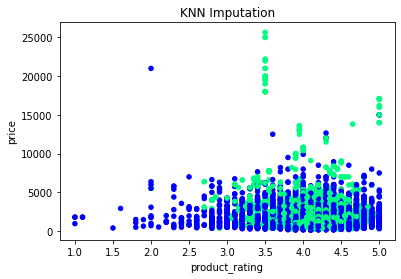

In [11]:
# Scatter plot of predicted values
fig = plt.Figure()
null_values = df_knn['product_rating'].isnull() 
fig = df_knn_imputed.plot(x='product_rating', y='price', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)


In [12]:
#df_knn_imputed[['rating_count', 'product_rating']]

In [13]:
# update the dataframe with the imputed values in the two columns
df['rating_count'] = df_knn_imputed['rating_count']
df['product_rating'] = df_knn_imputed['product_rating']

In [14]:
# Convert df['rating_count'] to int type
df['rating_count'] = df['rating_count'].astype(int)

In [15]:
# Round up values to one decimal in the product_rating column
df['product_rating'] = df['product_rating'].round(decimals = 1)

In [16]:
# Finally replace Nan values in material columns with 0 
df = df.replace(np.NaN, 0)
#df.head(10)

In [17]:
df[['cotton', 'polyester', 'silk', 'viscose', 'rayon',
       'elastane', 'spandex', 'acrylic', 'georgette', 'linen', 'nylon',
       'lycra', 'wool', 'chiffon', 'polyamide', 'organza', 'crepe', 'velvet',
       'modal', 'chanderi', 'fleece', 'leather', 'polyurethane', 'lyocell',
       'denim', 'jute', 'liva', 'shantun', 'poly_fibre_blend']] = df[['cotton', 'polyester', 'silk', 'viscose', 'rayon',
       'elastane', 'spandex', 'acrylic', 'georgette', 'linen', 'nylon',
       'lycra', 'wool', 'chiffon', 'polyamide', 'organza', 'crepe', 'velvet',
       'modal', 'chanderi', 'fleece', 'leather', 'polyurethane', 'lyocell',
       'denim', 'jute', 'liva', 'shantun', 'poly_fibre_blend']].astype(int)

In [18]:
# in column material_info if the expression 'art' is there then it entails artificial or synthetic or polyblend fibres
df.loc[df['material_info'].str.lower().str.contains('art'),['poly_fibre_blend']] = 1

In [21]:
natural_fibres = ['cotton', 'silk', 'linen', 'wool', 'georgette', 'chiffon','organza', 'chanderi','shantun', 'jute']
artificial_fibres = [ 'viscose', 'rayon', 'crepe', 'modal', 'denim', 'lyocell']
synthetic_fibres =  ['polyester','elastane', 'spandex', 'acrylic','nylon','lycra', 'polyamide', 'velvet','fleece', 'leather', 'polyurethane', 'liva', 'poly_fibre_blend']

In [22]:
# Create a new column 'is_100%_natural_fibre' to mark items that are composed of 100% natural fabric
df['is_100%_natural_fibre'] = 0

In [23]:
df.loc[(df[natural_fibres].sum(axis = 1) >0) & (df[artificial_fibres].sum(axis = 1) == 0) & (df[synthetic_fibres].sum(axis = 1) == 0),['is_100%_natural_fibre']] = 1

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  18000 non-null  object 
 1   product                18000 non-null  object 
 2   price                  18000 non-null  int64  
 3   link                   18000 non-null  object 
 4   gender                 18000 non-null  object 
 5   clothing_type          18000 non-null  object 
 6   wear_type              18000 non-null  object 
 7   product_rating         18000 non-null  float64
 8   rating_count           18000 non-null  int64  
 9   materials              18000 non-null  object 
 10  material_info          18000 non-null  object 
 11  cotton                 18000 non-null  int64  
 12  polyester              18000 non-null  int64  
 13  silk                   18000 non-null  int64  
 14  viscose                18000 non-null  int64  
 15  ra

In [25]:
df.head()

,brand,product,price,link,gender,clothing_type,wear_type,product_rating,rating_count,materials,...,fleece,leather,polyurethane,lyocell,denim,jute,liva,shantun,poly_fibre_blend,is_100%_natural_fibre
0,KALINI,Women Yoke Design Kurta Set,887,https://www.myntra.com/kurta-sets/kalini/kalin...,Women,Ethnic,women_kurta_kurti_suits,4.1,9300,"['cotton', 'blend']",...,0,0,0,0,0,0,0,0,1,0
1,Khushal K,Women Kurta Set With Dupatta,1427,https://www.myntra.com/kurta-sets/khushal-k/kh...,Women,Ethnic,women_kurta_kurti_suits,4.4,9600,['rayon'],...,0,0,0,0,0,0,0,0,0,0
2,Ahalyaa,Women Printed Kurta with Palazzos With Dupatta,1249,https://www.myntra.com/kurta-sets/ahalyaa/ahal...,Women,Ethnic,women_kurta_kurti_suits,3.6,4600,"['net', 'poly', 'crepe']",...,0,0,0,0,0,0,0,0,1,0
3,HERE&NOW,Women Floral Embroidered Georgette Kurta,659,https://www.myntra.com/kurtas/herenow/herenow-...,Women,Ethnic,women_kurta_kurti_suits,4.5,1700,['georgette'],...,0,0,0,0,0,0,0,0,0,1
4,KALINI,Women Printed Kurta with Trousers With Dupatta,874,https://www.myntra.com/kurta-sets/kalini/kalin...,Women,Ethnic,women_kurta_kurti_suits,4.1,5100,"['cotton', 'blend']",...,0,0,0,0,0,0,0,0,1,0


In [26]:
# Store the cleaned dataframe in a csv
df.to_csv("cleaned_data.csv", index=False)